# Practical 2: Quantitative Optical Remote Sensing

In this practical, we will build on the theoretical and Python concepts seen so far to load, plot, and perform quantitative analysis on data from [Landsat 8](https://en.wikipedia.org/wiki/Landsat_8).

## General instructions

Type out your answer to questions in the provided *Markdown* cell (delete the placeholder text). 
You can use the code cells provided to do the calculations.

Remember: 
* Double click on a Markdown cell to edit its contents.
* You can write equations in Markdown by surrounding them in `$`. The syntax for the equations is from a program called [LaTeX](https://en.wikipedia.org/wiki/LaTeX). You can learn about the syntax for writing equations with [this guide](https://www.overleaf.com/learn/latex/Mathematical_expressions).
* To get a cheat sheet of Markdown formatting, click on the menu: Help > Markdown Reference.
* Use descriptive variable names.
* Use the `print` function to display the contents of a variable.
* **Be mindful of units!**

Example equation: $\lambda = \dfrac{c}{\nu} = 10\ \mu m$

## Exercise 1

[![Landsat 8 and 7 bands](https://wiki.landscapetoolbox.org/lib/exe/fetch.php/remote_sensor_types:landsat8_bands.jpg)](https://wiki.landscapetoolbox.org/doku.php/remote_sensor_types:landsat_8)

Analysing the figure above:

1. Why do the sensors in Landsat-7 (ETM+) and Landsat-8 (OLI) avoid the blue spectrum for their panchromatic band?
2. What colour would vegetation appear in a RGB composite of bands 5-4-3 from a Landsat-8 image?

---

*Type your answers here.*

## Exercise 2

The figure below shows thermal emissivity for various rock types. 
The numbers at the top mark the different [ASTER](https://en.wikipedia.org/wiki/Advanced_Spaceborne_Thermal_Emission_and_Reflection_Radiometer) thermal infrared bands.


![Emissivity profiles for different rock types](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmedia.springernature.com%2Flw785%2Fspringer-static%2Fimage%2Fart%253A10.1007%252Fs13146-011-0071-4%2FMediaObjects%2F13146_2011_71_Fig2_HTML.gif&f=1&nofb=1)

1. Explain why the *carbonate index* (CI) is defined as $\dfrac{band_{13}}{band_{14}}$.
2. What would be a suitable *mafic index* (MI)? Explain your answer.

---

*Type your answers here.*

## Exercise 3

In this exercise, we will work with a subset of a Landsat-8 scene from [Kauai](https://en.wikipedia.org/wiki/Kauai) (one of the Hawaiian Islands). 

![](https://prd-wret.s3-us-west-2.amazonaws.com/assets/palladium/production/s3fs-public/thumbnails/image/Landsat%208%20band%20designations.jpg)

In [1]:
import numpy as np
import skimage.exposure
import matplotlib.pyplot as plt

In [54]:
scene = np.load("kilauea-landsat8.npy")

In [55]:
height, width = scene.shape[:2]
composite = np.empty((height, width, 3), dtype="uint16")
composite[:,:,0] = scene[:,:,4]
composite[:,:,1] = scene[:,:,3]
composite[:,:,2] = scene[:,:,2]
low, high = np.percentile(composite, (2, 98))
composite = skimage.exposure.rescale_intensity(composite, in_range=(low, high), out_range="uint8")

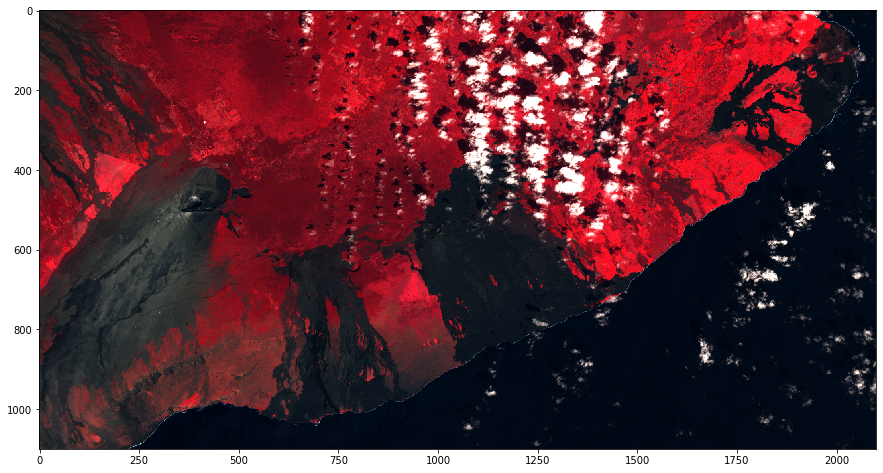

In [56]:
plt.figure(figsize=(15, 12))
plt.imshow(composite)

In [57]:
nir = scene[:,:,4].astype("float32")
red = scene[:,:,3].astype("float32")
combined = nir + red
nvdi = (nir - red)/(nir + red)
nvdi[combined == 0] = 0
#nvdi = nvdi[1000:1200, 1500:1750]

low, high = np.percentile(nvdi, (2, 98))
#nvdi = skimage.exposure.rescale_intensity(nvdi, in_range=(low, high))

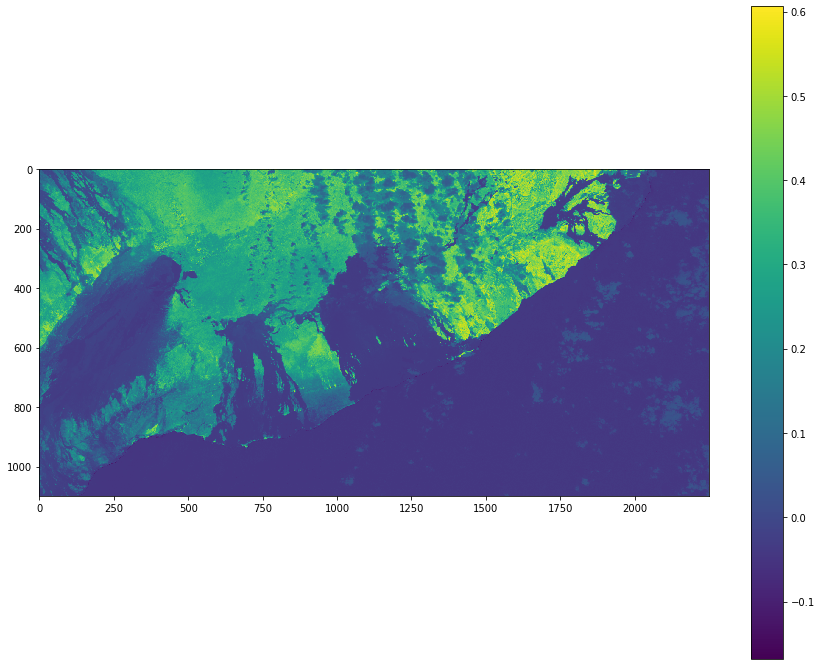

In [48]:
plt.figure(figsize=(15, 12))
#plt.imshow(nvdi[500:1000, 500:1000], cmap="gray")
plt.imshow(nvdi)
plt.colorbar()

In [7]:
scene

array([[[52, 43, 34, ..., 23, 24, 25],
        [52, 43, 34, ..., 23, 24, 25],
        [52, 43, 34, ..., 23, 24, 25],
        ...,
        [50, 42, 33, ..., 23, 24, 25],
        [50, 42, 33, ..., 23, 24, 25],
        [50, 42, 34, ..., 23, 24, 25]],

       [[52, 43, 34, ..., 23, 24, 25],
        [52, 43, 34, ..., 23, 24, 25],
        [52, 43, 34, ..., 23, 24, 25],
        ...,
        [50, 42, 33, ..., 23, 24, 25],
        [50, 42, 34, ..., 23, 24, 25],
        [50, 42, 34, ..., 23, 24, 25]],

       [[52, 43, 34, ..., 23, 24, 25],
        [52, 43, 34, ..., 23, 24, 25],
        [52, 43, 34, ..., 23, 24, 25],
        ...,
        [50, 42, 33, ..., 23, 24, 25],
        [50, 42, 34, ..., 23, 24, 25],
        [50, 42, 33, ..., 23, 24, 25]],

       ...,

       [[51, 42, 34, ..., 23, 24, 25],
        [51, 42, 34, ..., 23, 24, 25],
        [51, 42, 34, ..., 23, 24, 25],
        ...,
        [50, 42, 33, ..., 23, 24, 25],
        [50, 41, 33, ..., 23, 24, 25],
        [50, 41, 33, ..., 23, 24